In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data = pd.read_csv('cirrhosis.CSV')
# Note: Importing the same dataset that we used before
data_file = r"./ML Research CNN/tcga.rnaseq_fpkm_uq.example.txt.gz"
data = pd.read_csv(data_file, sep="\t")

In [3]:
# Note: 5000 columns. Need to use PCA later on. 
data.head()

,project,ENSG00000198886,ENSG00000198938,ENSG00000198712,ENSG00000198804,ENSG00000198695,ENSG00000198899,ENSG00000198763,ENSG00000198727,ENSG00000198840,...,ENSG00000162688,ENSG00000156026,ENSG00000104907,ENSG00000141030,ENSG00000172331,ENSG00000121101,ENSG00000106123,ENSG00000127616,ENSG00000108848,ENSG00000156171
0,BRCA,142443345,205445265,147699305,117404552,19543789,128074538,100669015,78626906,94521528,...,382567,95352,304543,308747,226017,5440,18911,343402,424057,351094
1,BRCA,78709354,135482824,121180246,88804234,39039866,71029840,41166438,62038429,80445271,...,160738,120179,179252,441331,226645,4703,49153,441665,319501,347807
2,BRCA,99604197,117501309,145945037,125820545,29398067,111459668,57571894,72484994,47528866,...,348926,143608,132642,287426,166473,19628,6255,410590,551479,266470
3,BRCA,199000111,166111590,196725218,172250215,48695291,104508816,102453636,108779676,116175259,...,91047,257669,206994,350421,325966,45224,18814,337762,306825,362499
4,BRCA,101196052,165092542,101739391,98060933,30626957,101645175,61853651,86458871,65193762,...,176419,90094,130460,415061,176510,16120,28053,241460,269349,277226


In [4]:
data.shape

(600, 5001)

In [5]:
# 3 output variables
data['project'].unique()

array(['BRCA', 'COAD', 'KIRC'], dtype=object)

In [6]:
# Note: Standardizing so that we can use PCA
df = data.loc[:, data.columns != 'project']
from sklearn import preprocessing
names = df.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [7]:
# Note: Using the PCA
from sklearn import preprocessing
from sklearn import decomposition

pca = decomposition.PCA()
df_plot = pd.DataFrame(pca.fit_transform(scaled_df), index=data.index)
df_plot

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,-2.839657,-10.445880,15.237815,-16.702372,8.842484,3.373958,-1.665245,1.554028,7.223032,6.370468,...,0.101700,0.039865,0.021387,0.036883,0.027455,-0.043504,0.021644,-0.008426,-0.096327,2.944455e-15
1,12.418740,-18.714515,18.695366,3.499248,-11.228010,-0.568816,6.193201,2.626075,-11.549008,1.337317,...,0.003278,0.100219,0.037245,-0.004829,-0.072288,0.055188,-0.016110,0.023687,-0.034666,2.944455e-15
2,0.507426,-28.774181,14.346849,-6.032672,-1.665448,-2.608347,2.873119,-3.018353,-3.001003,0.967144,...,-0.013474,0.095272,0.091443,0.006505,0.080337,-0.045930,0.037766,-0.008267,0.012735,2.944455e-15
3,-6.635627,-13.545971,16.128075,-16.766871,-8.800637,23.237971,-0.205306,-7.339374,-1.599968,1.460868,...,0.046064,0.104461,-0.066532,-0.084757,-0.019888,0.057780,-0.052449,0.011639,0.074563,2.944455e-15
4,-20.454584,-26.694659,8.042968,3.883628,5.067656,7.025973,-2.605806,2.030753,4.197511,4.008807,...,-0.076781,0.089052,-0.021307,0.191474,-0.197166,0.060877,0.045007,-0.032184,0.077287,2.944455e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,-26.348827,27.139345,-3.913466,-1.927165,-7.841317,-8.896410,6.165722,-6.550848,-3.841771,-2.034988,...,0.220170,-0.138107,0.001747,-0.125084,0.016085,-0.072357,0.084657,0.118905,-0.081201,2.944455e-15
596,-32.943383,13.944946,-9.666437,-5.316212,-5.963663,1.328434,-3.631446,-5.033466,9.674514,0.461627,...,-0.185786,-0.388123,0.257948,0.351359,-0.102648,0.015429,0.201576,0.161453,-0.077303,2.944455e-15
597,-36.881629,12.909506,0.796766,17.039347,-13.931855,1.611128,3.877636,0.752845,1.587419,14.086768,...,0.040499,0.004179,-0.023970,0.051491,0.014701,0.190600,-0.050214,0.061451,0.205603,2.944455e-15
598,-16.995201,33.833190,-2.559493,-16.987569,1.239054,-13.875813,-5.992537,2.454351,6.277324,-0.119567,...,0.175142,-0.057578,-0.105122,-0.184133,-0.081636,-0.041033,-0.076382,-0.135030,0.065253,2.944455e-15


In [8]:
pca = decomposition.PCA()
# fit : Run PCA
df_PC = pca.fit(scaled_df)

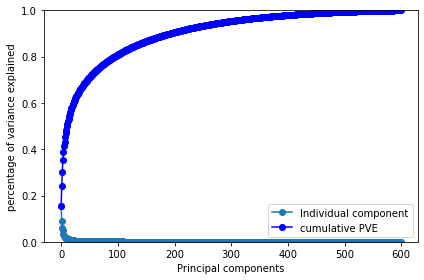

In [9]:
plt.figure(figsize=(6, 4))
plt.ylim(0, 1)

plt.plot(df_PC.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(np.cumsum(df_PC.explained_variance_ratio_), 'bo-', label='cumulative PVE')

plt.ylabel('percentage of variance explained')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [10]:
# We select 25 features because they add upto 60% of the variance
print(np.cumsum(df_PC.explained_variance_ratio_))

[0.15293673 0.24174977 0.30315427 0.355137   0.3882034  0.41360936
 0.43321753 0.45155085 0.46880016 0.48396303 0.49840139 0.51084905
 0.5220417  0.53278277 0.54298662 0.55261814 0.56118531 0.56921006
 0.57698085 0.58405942 0.59069431 0.59714626 0.60321559 0.60891179
 0.61449137 0.61995392 0.62520628 0.6301012  0.6348273  0.63945158
 0.64377963 0.64803345 0.65211666 0.65607026 0.65982107 0.6635507
 0.66722632 0.67087303 0.67441573 0.67789729 0.68129983 0.68460993
 0.68781765 0.69093938 0.69397969 0.69696957 0.69991297 0.7028317
 0.70574137 0.70855415 0.71134047 0.71407134 0.7167468  0.71938739
 0.7219941  0.72451644 0.72702223 0.72945552 0.73186405 0.73424084
 0.73658973 0.7388832  0.74117136 0.74342685 0.74564599 0.74784472
 0.75003146 0.75215318 0.75425067 0.75634    0.75840425 0.76043711
 0.76243366 0.76440704 0.76636196 0.76825509 0.77013911 0.77199741
 0.773823   0.77563231 0.77743288 0.77920183 0.78096388 0.78270763
 0.78442747 0.78611692 0.78779648 0.78945527 0.7910971  0.792711

In [11]:
# Note: Ignore
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()


# data['Status']= label_encoder.fit_transform(data['Status'])
# data['Drug']= label_encoder.fit_transform(data['Drug'])
# data['Sex']= label_encoder.fit_transform(data['Sex'])
# data['Ascites']= label_encoder.fit_transform(data['Ascites'])
# data['Hepatomegaly']= label_encoder.fit_transform(data['Hepatomegaly'])
# data['Spiders']= label_encoder.fit_transform(data['Spiders'])
# data['Edema']= label_encoder.fit_transform(data['Edema'])          

In [12]:
# Note: Ignore
# X = data.drop(['Stage'], axis = 1)
# X = X.drop(['ID'], axis = 1)
# X = X.drop(['Sex'], axis = 1)
# X = X.drop(['Status'], axis = 1)
# X = X.drop(['Ascites'], axis = 1)
# X = X.drop(['Edema'], axis = 1)
# X = X.drop(['Drug'], axis = 1)
# X = X.drop(['N_Days'], axis = 1)
# X = X.drop(['Prothrombin'], axis = 1)
# X = X.drop(['Platelets'], axis = 1)
# X = X.drop(['Tryglicerides'], axis = 1)

# y = data['Stage']

In [15]:
# Creating the 5*5 convolutional matrix from the 25 principal components
def create_one_row(row):
    list_temp = []
    for value in row:
        list_temp.append(value - row.mean())
    list_row = np.array(list_temp).reshape(7, 7)
    return list_row

def transform_dataframe(df):
    final_df = []
    for i in range(len(df)):
        final_df.append(create_one_row(df.iloc[i].values))
    return final_df

X = pd.DataFrame()
for i in range(49):
    X[i] = df_plot[i]
final_df = transform_dataframe(X)

In [16]:
# Note: Looking at how a convolutional matrix looks like
trial = final_df[0]
trial

array([[ -2.91760034, -10.52382301,  15.15987133, -16.78031545,
          8.76454104,   3.29601439,  -1.74318856],
       [  1.47608451,   7.14508857,   6.29252492,  -8.59814142,
          0.68937842,   4.05889839,   1.14134181],
       [  5.31413015,  -4.56060198,   9.47647651,   2.73144207,
         -6.46875832,   2.78711941,   3.72190592],
       [ -2.46040524,  -3.56222878,   3.06622712,  -0.52936116,
         -2.25796719, -10.72882395,  -1.61242208],
       [  4.81521559,  -1.28946043,  -0.65546513,  -2.27426662,
          7.25990473,   1.3344682 ,  -0.81261106],
       [ -4.14580086,   5.63157891,  -4.79395033,  -1.04329838,
          0.87550798,  -4.58126743,  -1.14935823],
       [  4.15125045,  -5.29048756,  -0.15460514,  -1.87306942,
          4.21976918,   1.87758601,  -4.47904753]])

In [17]:
# Note: Importing the base image
import numpy as np
from PIL import Image

img = Image.open('rose.jpg').convert('RGBA')
arr = np.array(img)

In [18]:
# Converting the base image into matrix in black and white form
!pip3 install opencv-python
import cv2
image = cv2.imread("rose.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2
        
# Note: Convolving with each of the 600 7*7 convolutional matrix     
final_output = []
for i in range(len(final_df)):
    convolveOutput = cv2.filter2D(gray, -1, final_df[i])
    final_output.append(convolveOutput)


In [20]:
# Note: Storing the convolved base image in different folders based on the output
counter = 0
for index in range(len(final_df)):
    name = 'img' + str(counter) + '.png'
    path = './data/train/'
    if data.project.values[index] == "BRCA":
        path = path + "BRCA/"
        name = path + name
        cv2.imwrite(name, final_output[index])
    elif data.project.values[index] == "COAD":
        path = path + "COAD/"
        name = path + name
        cv2.imwrite(name, final_output[index])
    elif data.project.values[index] == "KIRC":
        path = path + "KIRC/"
        name = path + name
        cv2.imwrite(name, final_output[index])
    counter = counter + 1

In [21]:
!pip install torch torchvision fastai
from fastai.vision import *
from fastai.metrics import accuracy

  Running command git clone -q https://github.com/fastai/fastai.git 'C:\Users\user\AppData\Local\Temp\pip-req-build-8cca1_cx'
  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/fastai/fastai.git 'C:\Users\user\AppData\Local\Temp\pip-req-build-8cca1_cx'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


  Cloning https://github.com/fastai/fastai.git to c:\users\user\appdata\local\temp\pip-req-build-8cca1_cx
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\user/.cache\torch\hub\checkpoints\resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

AttributeError: 'Sequential' object has no attribute 'plot'

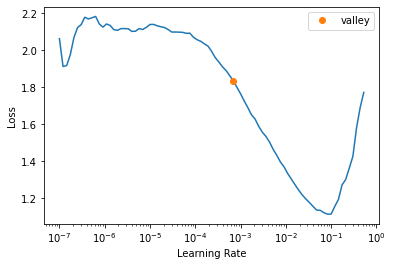

In [22]:
# Note: Training each of the images
!pip3 install git+https://github.com/fastai/fastai.git
from fastai.vision import *
from fastai.vision.data import ImageDataLoaders
from fastai.metrics import accuracy
from fastai.vision.all import *

path = "./data/train/"
size = 224
bs = 64
# data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, flip_vert=True),
#                                   valid_pct=0.2, size=size, bs=bs)
data = ImageDataLoaders.from_folder(path, valid_pct=0.2)
# data.normalize(imagenet_stats)
learner = cnn_learner(data, models.resnet34, metrics=[accuracy])
# learner = create_cnn_model(data, models.resnet18, metrics=[accuracy], callback_fns=ShowGraph)
learner.lr_find()
learner.recorder.plot()


In [23]:
learner.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time
0,2.119013,1.903365,0.408333,09:28
1,1.853741,1.156250,0.475000,09:12
2,1.534177,1.082123,0.525000,09:10
3,1.240216,1.158648,0.566667,09:26
4,0.995816,1.037512,0.608333,09:31
5,0.813688,0.708037,0.716667,09:29
6,0.680968,0.506707,0.800000,09:08
7,0.576911,0.397020,0.833333,09:14
8,0.486997,0.370057,0.900000,09:10
9,0.420664,0.374645,0.891667,09:09


Things to follow from here:
1. Compare datasets with <= 9 features and datasets with > 9 features with other machine learning and deep learning methods
2. Compare datasets with <= 25 features and datasets with > 25 features with other deep learning methods
3. Follow step 1 and 2 with 5 different black and white images and colorful images.
4. Compare different values with different resnets (14, 34, 52 etc). Comprehensive review of the efficiency of this method.
5. Fine tuning to increase its efficiency where it is found to be efficient.